### Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('data/fraud_data.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.isnull().values.any()

False

In [4]:
data[data.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
data = data.rename(columns = {'type' : 'Type', 'amount' : 'Amount', 
                              'nameOrig' : 'Origin', 'oldbalanceOrg' : 'OldbalanceOrg',
                               'newbalanceOrig': 'NewbalanceOrig', 'nameDest' : 'Destination', 
                               'oldbalanceDest' : 'OldbalanceDest', 
                               'newbalanceDest': 'NewbalanceDest', 'isFraud' : 'Fraud'})

 1 . The reason why I remove the column 'isfraud' is because it can be misleading. For example, is suppose to control  over and stop transaction that's are more then 200 000$ but not every isfraud are fraud and not every transaction over 200 000 is categorize as fraud
 
 2. Personnally , I remove step cause for me anyone who  want to fraud probably won't wait a specific hour to fraud.

In [28]:
data = data.drop(columns =['step', 'isFlaggedFraud'] )

In [29]:
data

,Type,Amount,Origin,OldbalanceOrg,NewbalanceOrig,Destination,OldbalanceDest,NewbalanceDest,Fraud
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


### Data exploration ###

In [30]:
data_F = data[data['Fraud']==1]
data_F.sample(50)

,Type,Amount,Origin,OldbalanceOrg,NewbalanceOrig,Destination,OldbalanceDest,NewbalanceDest,Fraud
5188065,CASH_OUT,200419.12,C1991181153,200419.12,0.00,C2069255486,4027748.60,4228167.73,1
6362443,CASH_OUT,1152538.90,C1040108506,1152538.90,0.00,C1101565058,0.00,1152538.90,1
1025518,TRANSFER,337974.21,C2029593206,337974.21,0.00,C1780194403,0.00,0.00,1
5994274,CASH_OUT,1464160.50,C2024056212,1464160.50,0.00,C1653697681,462739.95,1926900.44,1
3960296,TRANSFER,79446.06,C98463296,79446.06,0.00,C1491493728,0.00,0.00,1
4105315,CASH_OUT,1788729.73,C446736927,1788729.73,0.00,C1581175229,109598.50,1898328.23,1
1032310,TRANSFER,4120.14,C2002472710,4120.14,0.00,C2023856876,0.00,0.00,1
3610930,TRANSFER,1259972.05,C1376942715,1259972.05,0.00,C2065571407,0.00,0.00,1
6019720,TRANSFER,145482.09,C1089341002,145482.09,0.00,C1168895160,0.00,0.00,1
5188029,CASH_OUT,86258.11,C2116603253,86258.11,0.00,C1764741760,71277.81,157535.92,1


In [31]:
data_F.loc[(data_F['Amount'] >= 100000) & (data_F['Amount'] <= 200000)]

,Type,Amount,Origin,OldbalanceOrg,NewbalanceOrig,Destination,OldbalanceDest,NewbalanceDest,Fraud
1911,CASH_OUT,132842.64,C13692003,4499.08,0.0,C297927961,0.00,132842.64,1
4667,TRANSFER,169941.73,C540962910,169941.73,0.0,C2127862399,0.00,0.00,1
4668,CASH_OUT,169941.73,C2026325575,169941.73,0.0,C1394526584,0.00,169941.73,1
4857,TRANSFER,120074.73,C1409933277,120074.73,0.0,C162114152,0.00,0.00,1
4858,CASH_OUT,120074.73,C1174000532,120074.73,0.0,C410033330,0.00,120074.73,1
...,...,...,...,...,...,...,...,...,...
6362569,CASH_OUT,194521.28,C1558118886,194521.28,0.0,C987019949,7203373.74,7397895.02,1
6362588,TRANSFER,114149.44,C1157446475,114149.44,0.0,C1367473638,0.00,0.00,1
6362589,CASH_OUT,114149.44,C1235786818,114149.44,0.0,C1738374799,0.00,114149.44,1
6362594,TRANSFER,144945.34,C31496887,144945.34,0.0,C1251365829,0.00,0.00,1


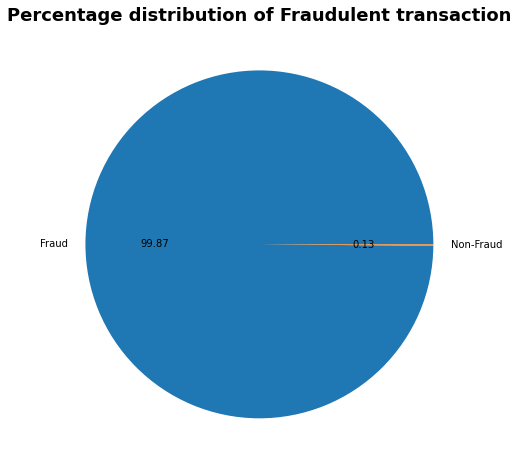

In [32]:
plt.figure(figsize=(15,8))
plt.pie(data.Fraud.value_counts().values, labels=['Fraud','Non-Fraud'], autopct='%.2f')
plt.title('Percentage distribution of Fraudulent transaction', fontsize=18, fontweight='bold')
plt.show()

In [33]:
data.Fraud.value_counts().values

array([6354407,    8213], dtype=int64)

Only 0,13 % of the entire dataset which correspond to 8213  have a fraudlent trasaction compare to the regular one (whitout fraud) which is 6354407.
There a huge gap between those two


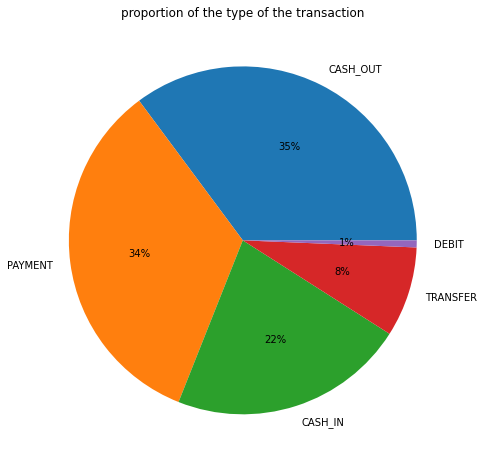

In [34]:
# # proportion of the type of the transaction
plt.figure(figsize=(15,8))
plt.pie(data.Type.value_counts().values,labels=data.Type.value_counts().index,autopct='%.0f%%')
plt.title("proportion of the type of the transaction")
plt.show()

In [35]:
data.Type.value_counts().values

array([2237500, 2151495, 1399284,  532909,   41432], dtype=int64)

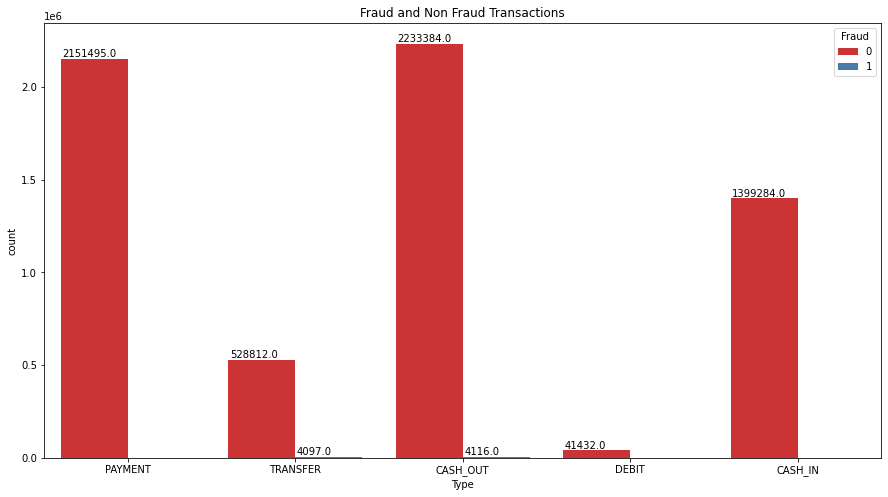

In [36]:
# comparaison of the type of fraudulent transaction and the none ones

plt.figure(figsize = (15, 8))
ax=sns.countplot(data = data, x = "Type", hue="Fraud", palette = 'Set1')
plt.title('Fraud and Non Fraud Transactions')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))

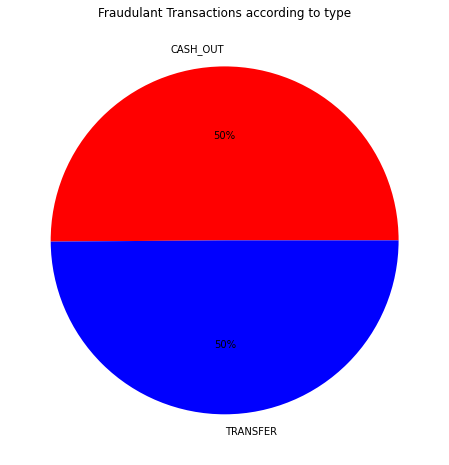

In [37]:
plt.figure(figsize=(15,8))
colors = ['red','blue']
plt.pie(data_F.Type.value_counts().values,labels=data_F.Type.value_counts().index, colors = colors,  autopct='%.0f%%')
plt.title("Fraudulant Transactions according to type")
plt.show()

There are four types of transaction in the dataset but only two were used to make suspicious payment.
In the 8213 fraudlent transactions  4116 is cash_out and  4097 is transfer money

In [38]:
data_F.Type.value_counts().values

array([4116, 4097], dtype=int64)

### Feature Engineering

In [42]:
data2 = data.copy()
data2['Type2'] = np.nan
data2.loc[data.Origin.str.contains('C') & data.Destination.str.contains('C'), 'Type2'] = 'CC'
data2.loc[data.Origin.str.contains('C') & data.Destination.str.contains('M'), 'Type2'] = 'CM'
data2.loc[data.Origin.str.contains('M') & data.Destination.str.contains('C'), 'Type2'] = 'MC'
data2.loc[data.Origin.str.contains('M') & data.Destination.str.contains('C'), 'Type2'] = 'MM'

In [43]:
cols = data2.columns.tolist()
new_position = 1

cols.insert(new_position, cols.pop(cols.index('Type2')))
data2 = data2[cols]

In [44]:
data2 = data2.drop(columns =['Origin', 'Destination'] )

In [45]:
data2

,Type,Type2,Amount,OldbalanceOrg,NewbalanceOrig,OldbalanceDest,NewbalanceDest,Fraud
0,PAYMENT,CM,9839.64,170136.00,160296.36,0.00,0.00,0
1,PAYMENT,CM,1864.28,21249.00,19384.72,0.00,0.00,0
2,TRANSFER,CC,181.00,181.00,0.00,0.00,0.00,1
3,CASH_OUT,CC,181.00,181.00,0.00,21182.00,0.00,1
4,PAYMENT,CM,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,CC,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,TRANSFER,CC,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,CASH_OUT,CC,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,TRANSFER,CC,850002.52,850002.52,0.00,0.00,0.00,1


In [47]:
data2.to_csv('fraud_dectection.csv')